In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
!pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
data = pd.read_csv("/content/diabetes_data.csv")

In [9]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
y = data.Outcome.values
x_data = data.drop(["Outcome"],axis=1)


In [13]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


                    feature        VIF
0               Pregnancies   3.275748
1                   Glucose  16.725078
2             BloodPressure  14.619512
3             SkinThickness   4.008696
4                   Insulin   2.063689
5                       BMI  18.408884
6  DiabetesPedigreeFunction   3.195626
7                       Age  13.492985


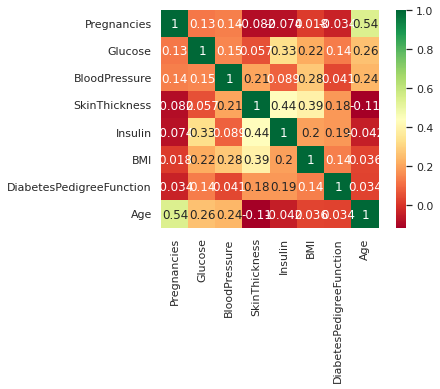

In [14]:
import seaborn as sns
sns.set(context="notebook",palette="Spectral",style="darkgrid",font_scale=1,color_codes=True)
p=sns.heatmap(x_data.corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=x_data
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)

In [15]:
x_data1 = x_data.drop(["BMI"],axis=1)

                    feature        VIF
0               Pregnancies   3.272901
1                   Glucose  13.573749
2             BloodPressure  12.372453
3             SkinThickness   3.475236
4                   Insulin   2.033589
5  DiabetesPedigreeFunction   3.151598
6                       Age  13.381319


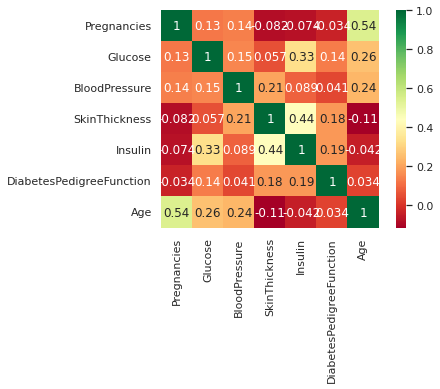

In [16]:
p=sns.heatmap(x_data1.corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=x_data1
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)

In [17]:
x_data2 = x_data1.drop(["Glucose"],axis=1)

                    feature        VIF
0               Pregnancies   3.266130
1             BloodPressure   9.940457
2             SkinThickness   3.475014
3                   Insulin   1.859553
4  DiabetesPedigreeFunction   3.026709
5                       Age  10.896809


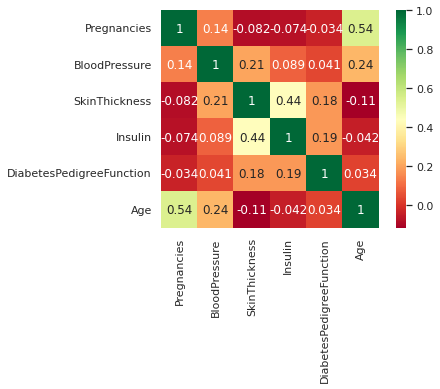

In [18]:
p=sns.heatmap(x_data2.corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=x_data2
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)

In [19]:
x_data3 = x_data2.drop(["Age"],axis=1)

                    feature       VIF
0               Pregnancies  2.306086
1             BloodPressure  5.288085
2             SkinThickness  3.447548
3                   Insulin  1.857940
4  DiabetesPedigreeFunction  2.897474


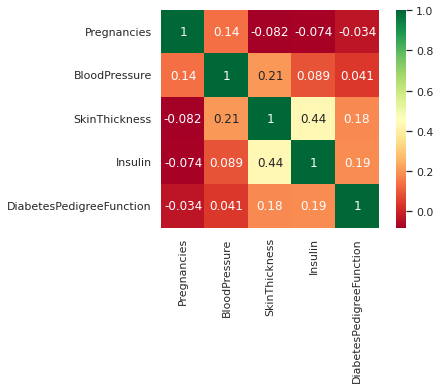

In [62]:
p=sns.heatmap(x_data3.corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=x_data3
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)

In [63]:
x_data4 = x_data3.drop(["BloodPressure"],axis=1)


Normalization of x_data Feature's

In [66]:
x = (x_data4 - np.min(x_data4)) / (np.max(x_data4) - np.min(x_data4)).values

In [67]:
x.shape

(768, 4)

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


Parameter Initialize and Sigmoid Function¶
In first function we will initialize weights and bias. In second function we will define the sigmoid function

In [69]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    
    y_head = 1 / (1+np.exp(-z))
    
    return y_head

Forward and Backward Propagation
To do forward propagation we need value of z. It can be seen on graph. After calculating z we put it into sigmoid function we defined. Then we will need losses which it's mathematical model is down below. After calculating loss value we will define cost which is the summation of loss function.

Loss Function:-(1-y)log(1-ycap)-ylog(ycap)

In [70]:
#%% Forward and Backward Propagation

def forward_backward_propagation(w,b,x_train,y_head):
    
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = (-y_train*np.log(y_head)) - ((1-y_train)*np.log(1-y_head))
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

Updating (Learning) Parameters
After doing backward propagation we will see that we need to update our parameters which are weights and bias. Why we need to do that ? In order to increase accuracy of model.

In [71]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
          
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
   

In [72]:
#%% Prediction

def predict(w,b,x_test):

    # x_test is a input for forward propagation
  z = sigmoid(np.dot(w.T,x_test)+b)
  Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
  for i in range(z.shape[1]):
    if z[0,i]<= 0.5:
      Y_prediction[0,i] = 0
    else:
      Y_prediction[0,i] = 1
  return Y_prediction

Defining Logistic Regression Function

In [78]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    print(parameters["weight"],parameters["bias"])
    from sklearn import metrics
    cm = metrics.confusion_matrix(y_test.T, y_prediction_test.T)
    print(cm)
    
    fpr, tpr, _ = metrics.roc_curve(y_test.T,  y_prediction_test.T)

    #create ROC curve
    import scikitplot as skplt
    import matplotlib.pyplot as plt 
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
  
  

    

Cost after iteration 0: 0.693798
Cost after iteration 100: 0.629452
Cost after iteration 200: 0.619185
Cost after iteration 300: 0.613775
Cost after iteration 400: 0.610817
Cost after iteration 500: 0.609142
Cost after iteration 600: 0.608161
Cost after iteration 700: 0.607570
Cost after iteration 800: 0.607203
Cost after iteration 900: 0.606971
Cost after iteration 1000: 0.606820
Cost after iteration 1100: 0.606720
Cost after iteration 1200: 0.606653
Cost after iteration 1300: 0.606606
Cost after iteration 1400: 0.606574
Cost after iteration 1500: 0.606551
Cost after iteration 1600: 0.606535
Cost after iteration 1700: 0.606523
Cost after iteration 1800: 0.606515
Cost after iteration 1900: 0.606508
Cost after iteration 2000: 0.606503
Cost after iteration 2100: 0.606500
Cost after iteration 2200: 0.606497
Cost after iteration 2300: 0.606495
Cost after iteration 2400: 0.606494
Cost after iteration 2500: 0.606493
Cost after iteration 2600: 0.606492
Cost after iteration 2700: 0.606491
Cost

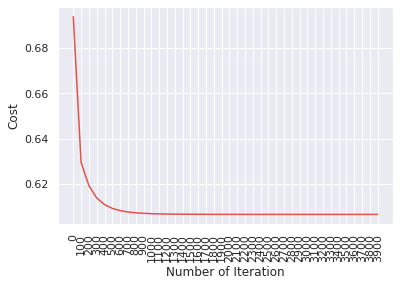

test accuracy: 70.12987012987013 %
[[2.39447992]
 [0.06451404]
 [1.57276021]
 [2.14637535]] -1.7234501220816163
[[90  9]
 [37 18]]


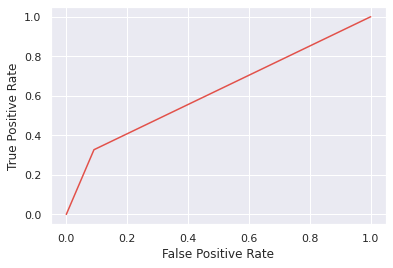

In [79]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.5, num_iterations = 4000)

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {}".format(lr.score(x_test.T,y_test.T)))

Test Accuracy 0.6948051948051948


sensitivity=0.70
specificity=0.66
precision=0.90